In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [5]:
data=pd.read_csv("wine.csv")
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
data.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


**Exploratory Data Analysis (EDA)**

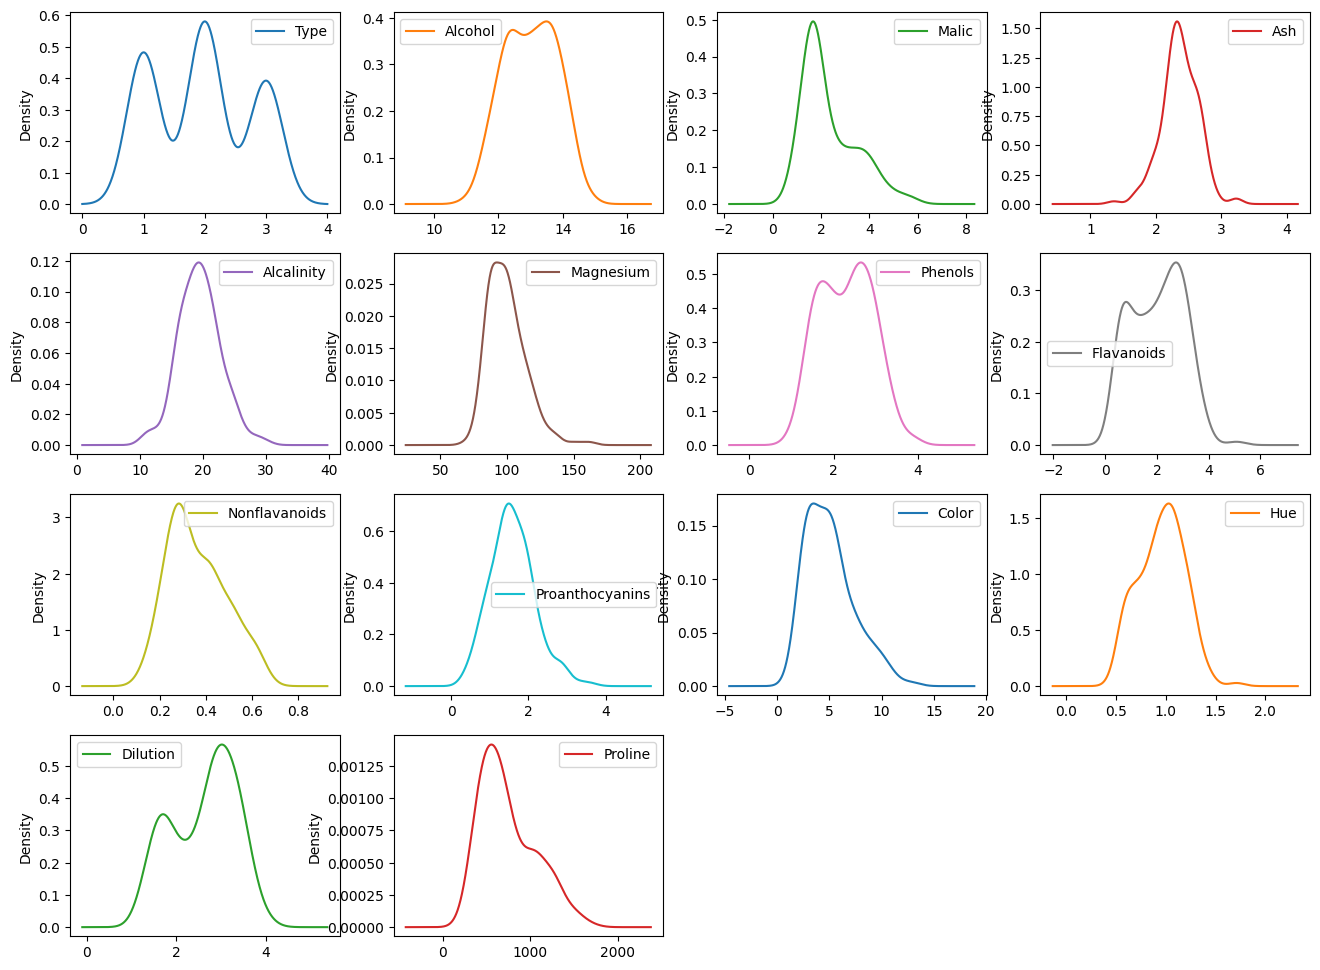

In [9]:
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(16,12))
plt.show()

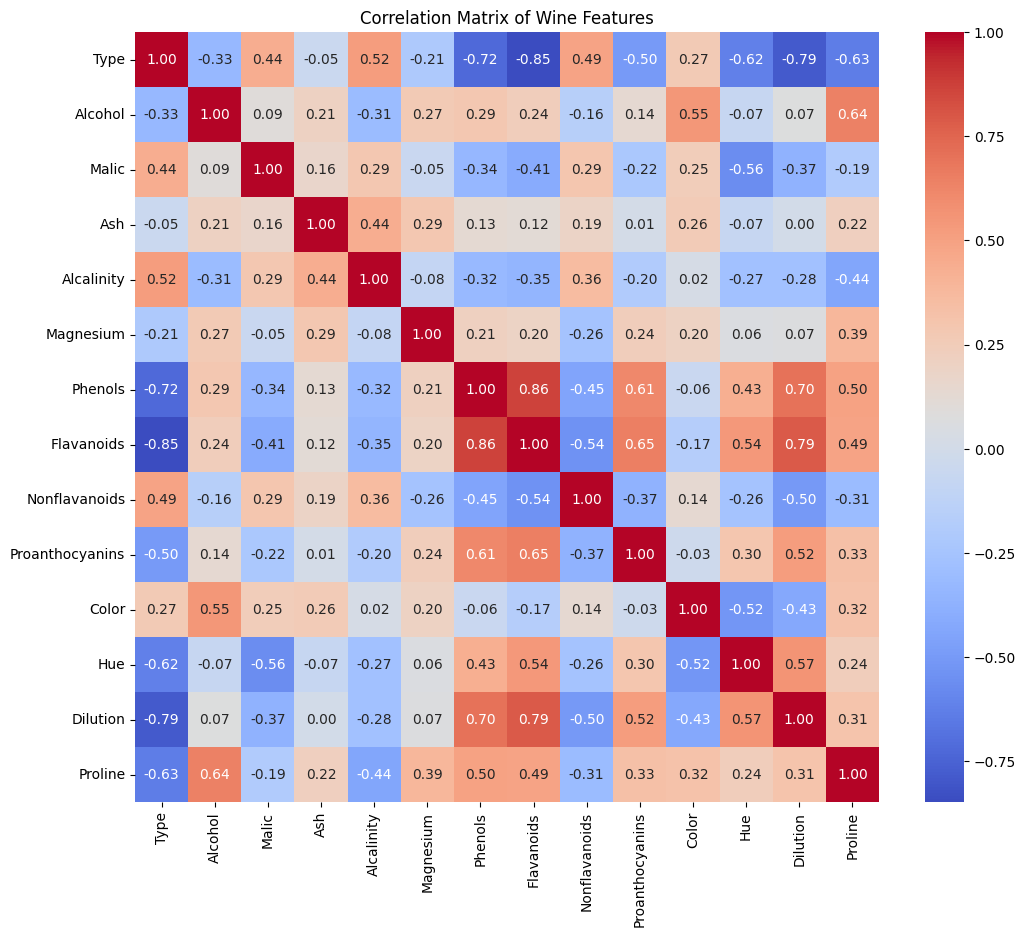

In [10]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Features')
plt.show()

**Dimensionality Reduction with PCA**

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [12]:
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

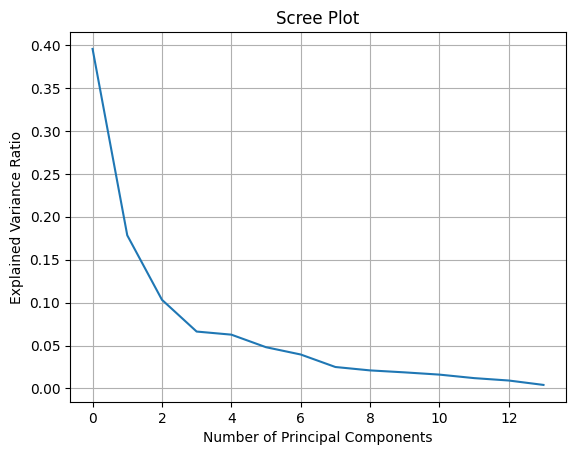

In [13]:
explained_variance = pca.explained_variance_ratio_
plt.plot(explained_variance)
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

In [14]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data) # transforming the data again
print(reduced_data)

[[-3.5229339   1.45309844]
 [-2.52885806 -0.33001925]
 [-2.78502898  1.03693595]
 [-3.92258841  2.76821026]
 [-1.40751111  0.86777309]
 [-3.28812981  2.13017513]
 [-2.75057754  1.17916999]
 [-2.39286652  1.61128232]
 [-2.79525633  0.92317952]
 [-3.00559666  0.79628417]
 [-3.67868855  1.31252342]
 [-2.10963477  0.61298199]
 [-2.43845636  0.67852331]
 [-3.67349453  1.14012136]
 [-4.44157575  2.11031917]
 [-2.60892387  1.66641801]
 [-2.47542846  2.33089672]
 [-2.22623243  1.63359016]
 [-3.74226929  2.52840527]
 [-2.3944115   1.06452946]
 [-3.33656895  0.79601279]
 [-1.48140399  0.24008547]
 [-2.82806867 -0.08685755]
 [-2.00771405 -0.51561649]
 [-2.11463604 -0.31592057]
 [-1.39753751  0.93821529]
 [-2.13348803  0.68710205]
 [-1.62970383 -0.09118403]
 [-2.50760753  0.69274983]
 [-2.55948318  0.1954729 ]
 [-2.77244452  1.24635279]
 [-2.93513374  1.47827883]
 [-1.99124842  0.05325201]
 [-2.24570987  1.6346691 ]
 [-1.78698628  0.69748039]
 [-2.22763867  0.17928892]
 [-1.76802847  0.65787231]
 

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [19]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(n_clusters=3)

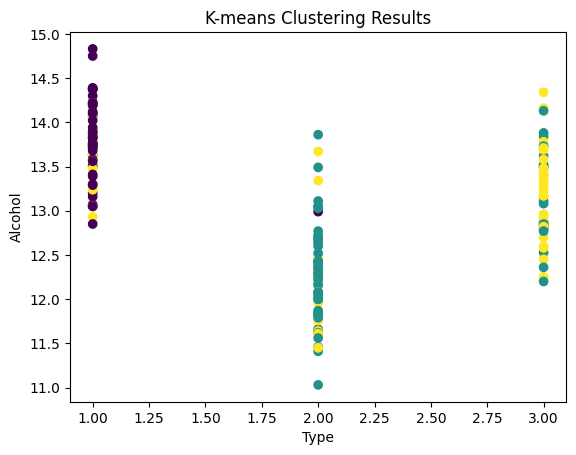

In [18]:
cluster_labels = kmeans.labels_
plt.scatter(data["Type"], data["Alcohol"], c=cluster_labels)  # Replace features with your desired axes
plt.xlabel("Type")
plt.ylabel("Alcohol")
plt.title("K-means Clustering Results")
plt.show()

**Clustering with PCA Data**

In [20]:
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(reduced_data)

KMeans(n_clusters=3)

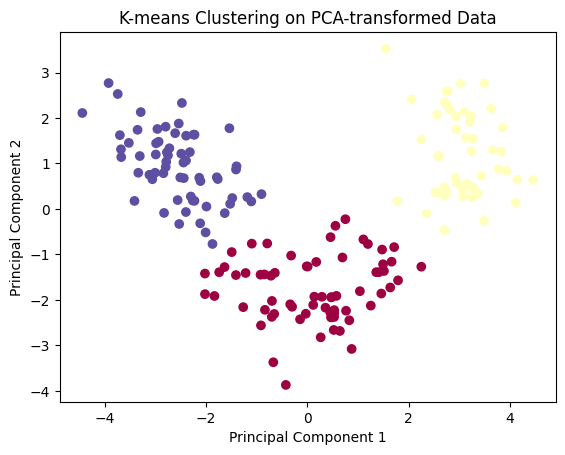

In [21]:
cluster_labels_pca = kmeans_pca.labels_
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels_pca, cmap='Spectral')  # Using different colormap
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clustering on PCA-transformed Data")
plt.show()

In [22]:
print("**Comparison:**")
print("Silhouette Score (Original):", silhouette_score(data, cluster_labels))
print("Silhouette Score (PCA):", silhouette_score(reduced_data, cluster_labels_pca))
print("Davies-Bouldin Score (Original):", davies_bouldin_score(data, cluster_labels))
print("Davies-Bouldin Score (PCA):", davies_bouldin_score(reduced_data, cluster_labels_pca))

**Comparison:**
Silhouette Score (Original): 0.5711220218931753
Silhouette Score (PCA): 0.6024415520362845
Davies-Bouldin Score (Original): 0.5342660703679686
Davies-Bouldin Score (PCA): 0.5397078562575713


**Comparison and Analysis**

Higher silhoutte score indicate better clustering. Original data score is 0.57 where as silhouette score for PCA data is 0.60 which indicates better clustering.



**Conclusion and Insights**

1.Key findings and insights:
  I explored the wine dataset using EDA, examining feature distributions and correlations.
  PCA has been implemented to reduce the dimensionality of the data.
  k means clustering was applied to both the original and pca transformed data tp group wine samples based on their characteristics
  The clustering performance is evaluated using silhouette score and davies-bouldin score.

2. Practical implications of PCA and clustering:
  PCA: simplifies data analysis by reducing complexity
  useful for visualisation when dealing with many features.

 clustering: groups data points into meaningful categories based on similarities

3. Reccomendations for using pca and clustering use pca when dealing with high dimensional data that might be computationally expensive for clustering algo